<div style="color:#3c4d5a; border-top: 7px solid #42A5F5; border-bottom: 7px solid #42A5F5; padding: 5px; text-align: center; text-transform: uppercase"><h1>Compresión de Imágenes mediante Reducción de Dimensionalidad con Análisis de Componentes Principales (PCA) </h1> </div>

Desarrollado por: Ing. Remigio Hurtado Ortiz, PhD. Universidad Politécnica Salesiana. Grupo de Inteligencia Artificial y Tecnologías de Asistencia. Correo de contacto: rhurtadoo@ups.edu.ec 

En esta práctica aprenderás a comprimir imágenes mediante una técnica de análisis multivariante conocida como PCA. Podrás ajustar la compresión de una imagen mediante la selección de los N componentes principales deseados. 
    
Requisitos: es importante tener conocimientos de Python y de fundamentos de análisis de datos.

Esta práctica está estructurada de la siguiente manera:

- [Fundamentos de Análisis de Componentes Principales](#Fundamentos)
- [Carga de imagen](#Carga)
- [Preparación: reshape de imagen](#Preparacion)
- [Reducción de dimensionalidad con PCA](#Reduccion)
- [Visualización de imagen reducida](#Visualizacion)
- [Conclusiones](#Conclusiones)
- [Referencias](#Referencias)

<div id="Fundamentos" style="color:#37475a; border-bottom: 7px solid orange; width: 100%; margin-bottom: 15px; padding-bottom: 2px"><h2>Fundamentos de Análisis de Componentes Principales</h2> </div>

El análisis de componentes principales, o PCA, es una técnica estadística para convertir datos de alta dimensión en datos de baja dimensión, mediante la selección de las características más importantes que capturan la máxima información (varianza) sobre el conjunto de datos [1]. Las características se seleccionan sobre la base de la varianza que causan en la salida. La característica que causa la mayor variación es el primer componente principal. La característica que es responsable de la segunda varianza más alta se considera el segundo componente principal, y así sucesivamente. Es importante mencionar que los componentes principales no tienen ninguna correlación entre sí (Al obtener la tabla de correlación entre los componentes principales, los resultados son aproximadamente cero).

<div id="Importacion" style="color:#106ba3"><h3>Ventajas de PCA</h3> </div>

- El tiempo de entrenamiento de los algoritmos se reduce significativamente con menos variables.
- No siempre es posible analizar datos en altas dimensiones. Por ejemplo, si hay 100 características en un conjunto de datos. El número total de gráficos de dispersión necesarios para visualizar los datos sería 100 (100-1) / 2 = 4950. En la práctica, no es posible analizar los datos de esta manera.

Es imperativo mencionar que un conjunto de características debe normalizarse antes de aplicar PCA. Por ejemplo, si un conjunto de características tiene datos expresados en unidades de Kilogramos, Años luz o Millones, la escala de variación es enorme en el conjunto de entrenamiento. Si se aplica PCA en un conjunto de características de este tipo, las cargas resultantes para las características con alta variación también serán grandes. Por lo tanto, los componentes principales se desviarán hacia características con alta varianza, lo que conducirá a resultados falsos.

PCA es una técnica estadística y solo se puede aplicar a datos numéricos. Por lo tanto, se requiere que las características categóricas se conviertan en características numéricas antes de poder aplicar PCA [2].

Puedes revisar una práctica de transformación de datos <a href="https://efecode.com/preparacion-de-datos-transformacion-de-variables-categoricas-a-numericas-y-transformaciones-numericas" target="blank">aquí</a>

<div id="Importacion" style="color:#106ba3"><h3>Selección de cantidad de componentes principales</h3> </div>

Para seleccionar las dimensiones adecuadas, sin perder información valiosa podemos seguir 3 métodos:

**Método 1:** elegimos arbitrariamente las primeras n dimensiones (las más importantes). Por ejemplo, si lo que queremos es poder graficar en 3 dimensiones, podríamos tomar las 3 características nuevas y más relevantes, y usarlas como los ejes X, Y, Z.

**Método 2:** calcular la proporción de variación explicada de cada característica e ir tomando dimensiones hasta alcanzar un mínimo que nos propongamos, por ejemplo, hasta alcanzar a explicar el 85% de la variabilidad total.

**Método 3:** crear una gráfica especial a partir del método 2 y seleccionar cuántas dimensiones usaremos por el método del codo en donde identificamos visualmente el punto en donde se produce una caída significativa en la variación explicada relativa a la característica anterior.

<div id="Carga" style="color:#37475a; border-bottom: 7px solid orange; width: 100%; margin-bottom: 15px; padding-bottom: 2px"><h2>Carga de imagen</h2> </div>

(256, 349, 4)
Dim1:  256
Dim2:  349
Dim3:  4


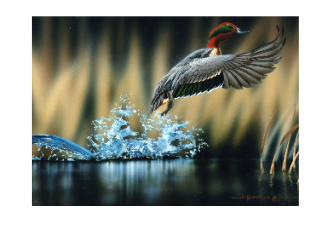

In [1]:
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt
import numpy as np 
from sklearn.decomposition import PCA
path=r'';
img = mpimg.imread(path+'wild.png') 

print (img.shape) 
plt.axis('off') 
plt.imshow(img) 

dimension1=img.shape[0]
print('Dim1: ',dimension1)

dimension2=img.shape[1]
print('Dim2: ',dimension2)

dimension3=img.shape[2]
print('Dim3: ',dimension3)

<div id="Preparacion" style="color:#37475a; border-bottom: 7px solid orange; width: 100%; margin-bottom: 15px; padding-bottom: 2px"><h2>Preparación: reshape de imagen</h2> </div>

La imagen tiene 256 filas, cada fila tiene 349x4 pixeles. Transformaremos la imagen en un formato adecuado para que PCA pueda trabajar (2 dimensiones). Los algoritmos clásicos de machine learning trabajan con 2 dimensiones. Una Red Neuronal Convolucional puede trabajar con más de 2 dimensiones.

In [2]:
# 1396 = 349 * 4 
totalColumnas= dimension2 * dimension3
print('Cantidad de columnas (variables):',totalColumnas)

Cantidad de columnas (variables): 1396


(256, 1396)


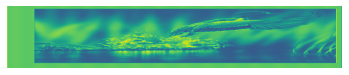

In [3]:
img_r = np.reshape(img, (dimension1, totalColumnas)) 
#help(np.reshape)
print (img_r.shape)
plt.axis('off') 
plt.imshow(img_r) 

<div id="Reduccion" style="color:#37475a; border-bottom: 7px solid orange; width: 100%; margin-bottom: 15px; padding-bottom: 2px"><h2>Reducción de dimensionalidad con PCA</h2> </div>

Con PCA intentaremos reducir de 1396 variables (columnas) a una cantidad menor de nuevas variables que representen aproximadamente la misma cantidad de información (varianza) de la imagen original. Esta estructura reducida se denomina un modelo puesto que representa el conjunto de datos original.

In [7]:
ipca = PCA(50).fit(img_r)

img_c = ipca.transform(img_r) 
print (img_c.shape) 
print (ipca.explained_variance_ratio_)
print (np.sum(ipca.explained_variance_ratio_))
np.size(ipca.explained_variance_ratio_)
#ipca.explained_variance_ratio_
#Con 35 componenentes podemos tener el 98% de la información (varianza)

(256, 50)
[7.6554030e-01 7.7146120e-02 5.3119566e-02 1.7278358e-02 1.2116146e-02
 8.0297878e-03 7.2830082e-03 4.7826162e-03 4.2084376e-03 3.8596357e-03
 3.1268352e-03 2.7436838e-03 2.6165352e-03 1.9014607e-03 1.8129365e-03
 1.5791102e-03 1.5628199e-03 1.2823957e-03 1.2527539e-03 1.2129870e-03
 1.0712607e-03 9.8071806e-04 9.6492347e-04 8.7842159e-04 8.2772621e-04
 7.8069087e-04 7.3092355e-04 7.2908553e-04 6.8225595e-04 6.7542592e-04
 6.3398277e-04 6.1704783e-04 5.9150683e-04 5.4193818e-04 5.2494049e-04
 5.2368693e-04 4.8936834e-04 4.7383903e-04 4.6416934e-04 4.4314866e-04
 4.2479363e-04 4.2164311e-04 3.9823272e-04 3.6826436e-04 3.6124396e-04
 3.4820387e-04 3.2936496e-04 3.1791470e-04 3.1476165e-04 3.0583600e-04]
0.9896709


50

<div id="Visualizacion" style="color:#37475a; border-bottom: 7px solid orange; width: 100%; margin-bottom: 15px; padding-bottom: 2px"><h2>Visualización de imagen reducida</h2> </div>

In [8]:
#Visualización de como PCA ha realizado su compresión: se obtiene la transformada inversa de la salida de PCA y 
#se transforma posteriormente para su visualización. 
temp = ipca.inverse_transform(img_c) 
print (temp.shape) 

#reshaping 1396 back to the original 349 * 4 
temp = np.reshape(temp, (dimension1,dimension2,dimension3)) 
print (temp.shape)

(256, 1396)
(256, 349, 4)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


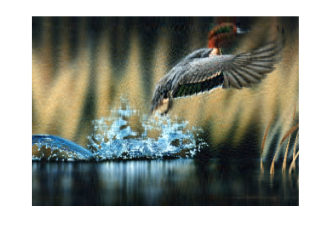

In [9]:
#Visualizar con imshow la imagen comprimida
plt.axis('off') 
plt.imshow(temp)

<div id="Conclusiones" style="color:#37475a; border-bottom: 7px solid orange; width: 100%; margin-bottom: 15px; padding-bottom: 2px"><h2>Conclusiones</h2> </div>

Hemos aprendido a aplicar una técnica de reducción de dimensionalidad en un problema de compresión de imágenes. Hemos obtenido más del 97% de la varianza con 25 componentes y en la imagen hemos podido visualmente reconocer los elementos más importantes. Hemos transformado una imagen de 140KB a una de 95KB.

<div id="Referencias" style="color:#37475a; border-bottom: 7px solid orange; width: 100%; margin-bottom: 15px; padding-bottom: 2px"><h2>Referencias</h2> </div>

[1] Bishop, C. M. (2006). Pattern recognition and machine learning. springer.

[2] P. Joshi. (2017). Artificial intelligence with python. Packt Publishing Ltd.

**Enlaces de documentación de scikit-learn:**

https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html